<a href="https://colab.research.google.com/github/rmkkrishna1990/my-repository.com/blob/master/Single_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrading TensorFlow

[TensorFlow](https://www.tensorflow.org/) is available by default but you can switch which version you're using.

In [1]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 1.13.0rc2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, numpy, tensorboard, absl-py, tensorflow-estimator, protobuf, grpcio, keras-applications, gast, six, astor, termcolor, wheel
Required-by: stable-baselines, magenta, fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.0rc2)
    100% |████████████████████████████████| 35.0MB 771kB/s 
    100% |████████████████████████████████| 890kB 16.3MB/s 
    100% |████████████████████████████████| 245kB 27.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
Successfully built html

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [0]:
!pip install -q matplotlib-venn

In [3]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 131284 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive) 

In [4]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.3) ...


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [6]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 131345 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [11]:
!pip install -q future
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

tf.VERSION



'1.13.0-dev20190220'

In [12]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)


228818944/228813984==============================] - 2s 0us/step


In [13]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root))
image_data


Found 3670 images belonging to 5 classes.


In [14]:
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break


Image batch shape:  (32, 256, 256, 3)
Labe batch shape:  (32, 5)


In [0]:
classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" #@param {type:"string"}


In [17]:
def classifier(x):
  classifier_module = hub.Module(classifier_url)
  return classifier_module(x)
  
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))
IMAGE_SIZE

[224, 224]

In [18]:
classifier_layer = layers.Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])
classifier_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [19]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break


Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [0]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)


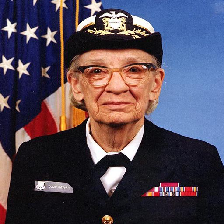

In [24]:
import numpy as np
import PIL.Image as Image

grass_hopper = tf.keras.utils.get_file('image.jpg','https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwi30OCamszgAhUBf7wKHYRLAZQQjRx6BAgBEAU&url=https%3A%2F%2Fwww.google.com%2Fimghp%3Fhl%3DEN&psig=AOvVaw1ct9T8yFquQ-K49usq95aH&ust=1550817141078894')
grass_hopper = Image.open(grass_hopper).resize(IMAGE_SIZE)
grass_hopper 